## Bootstrapping

We are going to use the same dataset we used in cross-validation to calculate a standard deviation of the parameters of the fit.

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
auto = pd.read_csv('data/auto.csv')
auto.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,3,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,4,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,5,17,8,302,140,3449,10.5,70,1,ford torino


In [14]:
X = auto[['horsepower']].values
y = auto.mpg.values

In [44]:
poly = PolynomialFeatures(degree=2)
n_iter = 10000
coefArray = np.zeros(shape=(n_iter,3))
for i in range(n_iter):
    i_train = np.random.randint(len(y),size=len(y)) #this is bootstraping, sampling from the original data set with 
                                                    # replacement
    X_train, y_train = X[i_train], y[i_train]
    X_trans = poly.fit_transform(X_train)
    lf = linear_model.LinearRegression()
    lf.fit(X_trans,y_train)
    
    #Calculate coefficients
    coef = lf.coef_
    coef[0] = lf.intercept_
    coefArray[i] = coef

In [47]:
print np.mean(coefArray,axis = 0)
print np.std(coefArray,axis=0)
# confidence intervals 
print np.percentile(coefArray,97.5, axis=0)
print np.percentile(coefArray,2.5, axis=0)

[  5.69174028e+01  -4.66696163e-01   1.23316878e-03]
[  2.08307153e+00   3.32366476e-02   1.20173038e-04]
[  6.09506176e+01  -4.02615613e-01   1.46994814e-03]
[  5.28972396e+01  -5.31566451e-01   1.00081726e-03]


(array([  2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+01,   2.20000000e+01,
          4.20000000e+01,   8.00000000e+01,   1.54000000e+02,
          2.62000000e+02,   4.11000000e+02,   5.74000000e+02,
          7.44000000e+02,   9.42000000e+02,   1.05300000e+03,
          1.08600000e+03,   1.12100000e+03,   8.90000000e+02,
          8.07000000e+02,   6.35000000e+02,   4.40000000e+02,
          3.24000000e+02,   2.00000000e+02,   9.40000000e+01,
          5.50000000e+01,   2.80000000e+01,   1.20000000e+01,
          6.00000000e+00,   1.00000000e+00,   3.00000000e+00]),
 array([-0.61085838, -0.60165635, -0.59245432, -0.58325228, -0.57405025,
        -0.56484822, -0.55564618, -0.54644415, -0.53724211, -0.52804008,
        -0.51883805, -0.50963601, -0.50043398, -0.49123194, -0.48202991,
        -0.47282788, -0.46362584, -0.45442381, -0.44522177, -0.43601974,
        -0.42681771, -0.41761567, -0.40841364, -0.3992116 , -0.39000957,
        -0.38

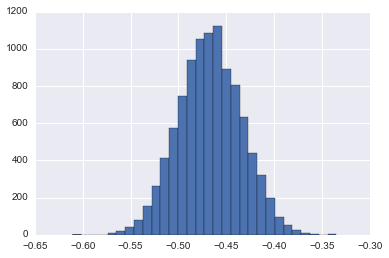

In [49]:
plt.hist(coefArray[:,1],30) 

1